# NAIVE BAYES

In [236]:
import numpy as np
import pandas as pd

## I. Chuẩn bị dữ liệu

In [237]:
df = pd.read_csv('../Dataset/archive/WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [238]:
df

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [239]:
X = df.drop(['EmployeeCount', 'EmployeeNumber', 'Over18', 'StandardHours'], axis=1)
y = df['Attrition']

In [240]:
print(f'Số bản ghi dữ liệu: {len(X)}')
print(f'Số cột dữ liệu (tập X): {len(X.columns)}')


Số bản ghi dữ liệu: 1470
Số cột dữ liệu (tập X): 31


In [241]:
X

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [242]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

## II. One Hot Encoding và Label Encoding

In [243]:
X_origin = X.copy()
y_origin = y.copy()

In [244]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# define model encoding
one_hot_encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')
label_encoder = LabelEncoder()

In [245]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Giả sử X_origin là DataFrame ban đầu
encode_cols = [
    'BusinessTravel', 'Department', 'Education', 'EducationField',
    'EnvironmentSatisfaction', 'Gender', 'JobInvolvement', 'JobLevel',
    'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime',
    'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
    'WorkLifeBalance'
]

# fit chuyển đổi luôn
X_encoded_array = one_hot_encoder.fit_transform(X_origin[encode_cols])

# Lấy tên cột mới sau khi mã hóa
encoded_columns = one_hot_encoder.get_feature_names_out(encode_cols)

# Tạo DataFrame từ mảng mã hóa
X_encoded_df = pd.DataFrame(X_encoded_array, columns=encoded_columns, index=X_origin.index)

# Gộp với phần dữ liệu còn lại
X_encode = pd.concat([X_origin.drop(columns=encode_cols), X_encoded_df], axis=1)

In [246]:
X_encode['Attrition'] = X_encode['Attrition'].map({'Yes':1, 'No':0})

In [247]:
X_encode

,Age,Attrition,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,...,PerformanceRating_4,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,41,1,1102,1,94,5993,19479,8,11,8,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,49,0,279,8,61,5130,24907,1,23,10,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,37,1,1373,2,92,2090,2396,6,15,7,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,33,0,1392,3,56,2909,23159,1,11,8,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,27,0,591,2,40,3468,16632,9,12,6,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,0,884,23,41,2571,12290,4,17,17,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1466,39,0,613,6,42,9991,21457,4,15,9,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1467,27,0,155,4,87,6142,5174,1,20,6,...,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1468,49,0,1023,2,63,5390,13243,2,14,17,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [248]:
y_encode = label_encoder.fit_transform(y_origin)

In [249]:
y_encode

array([1, 0, 1, ..., 0, 0, 0], shape=(1470,))

<Axes: >

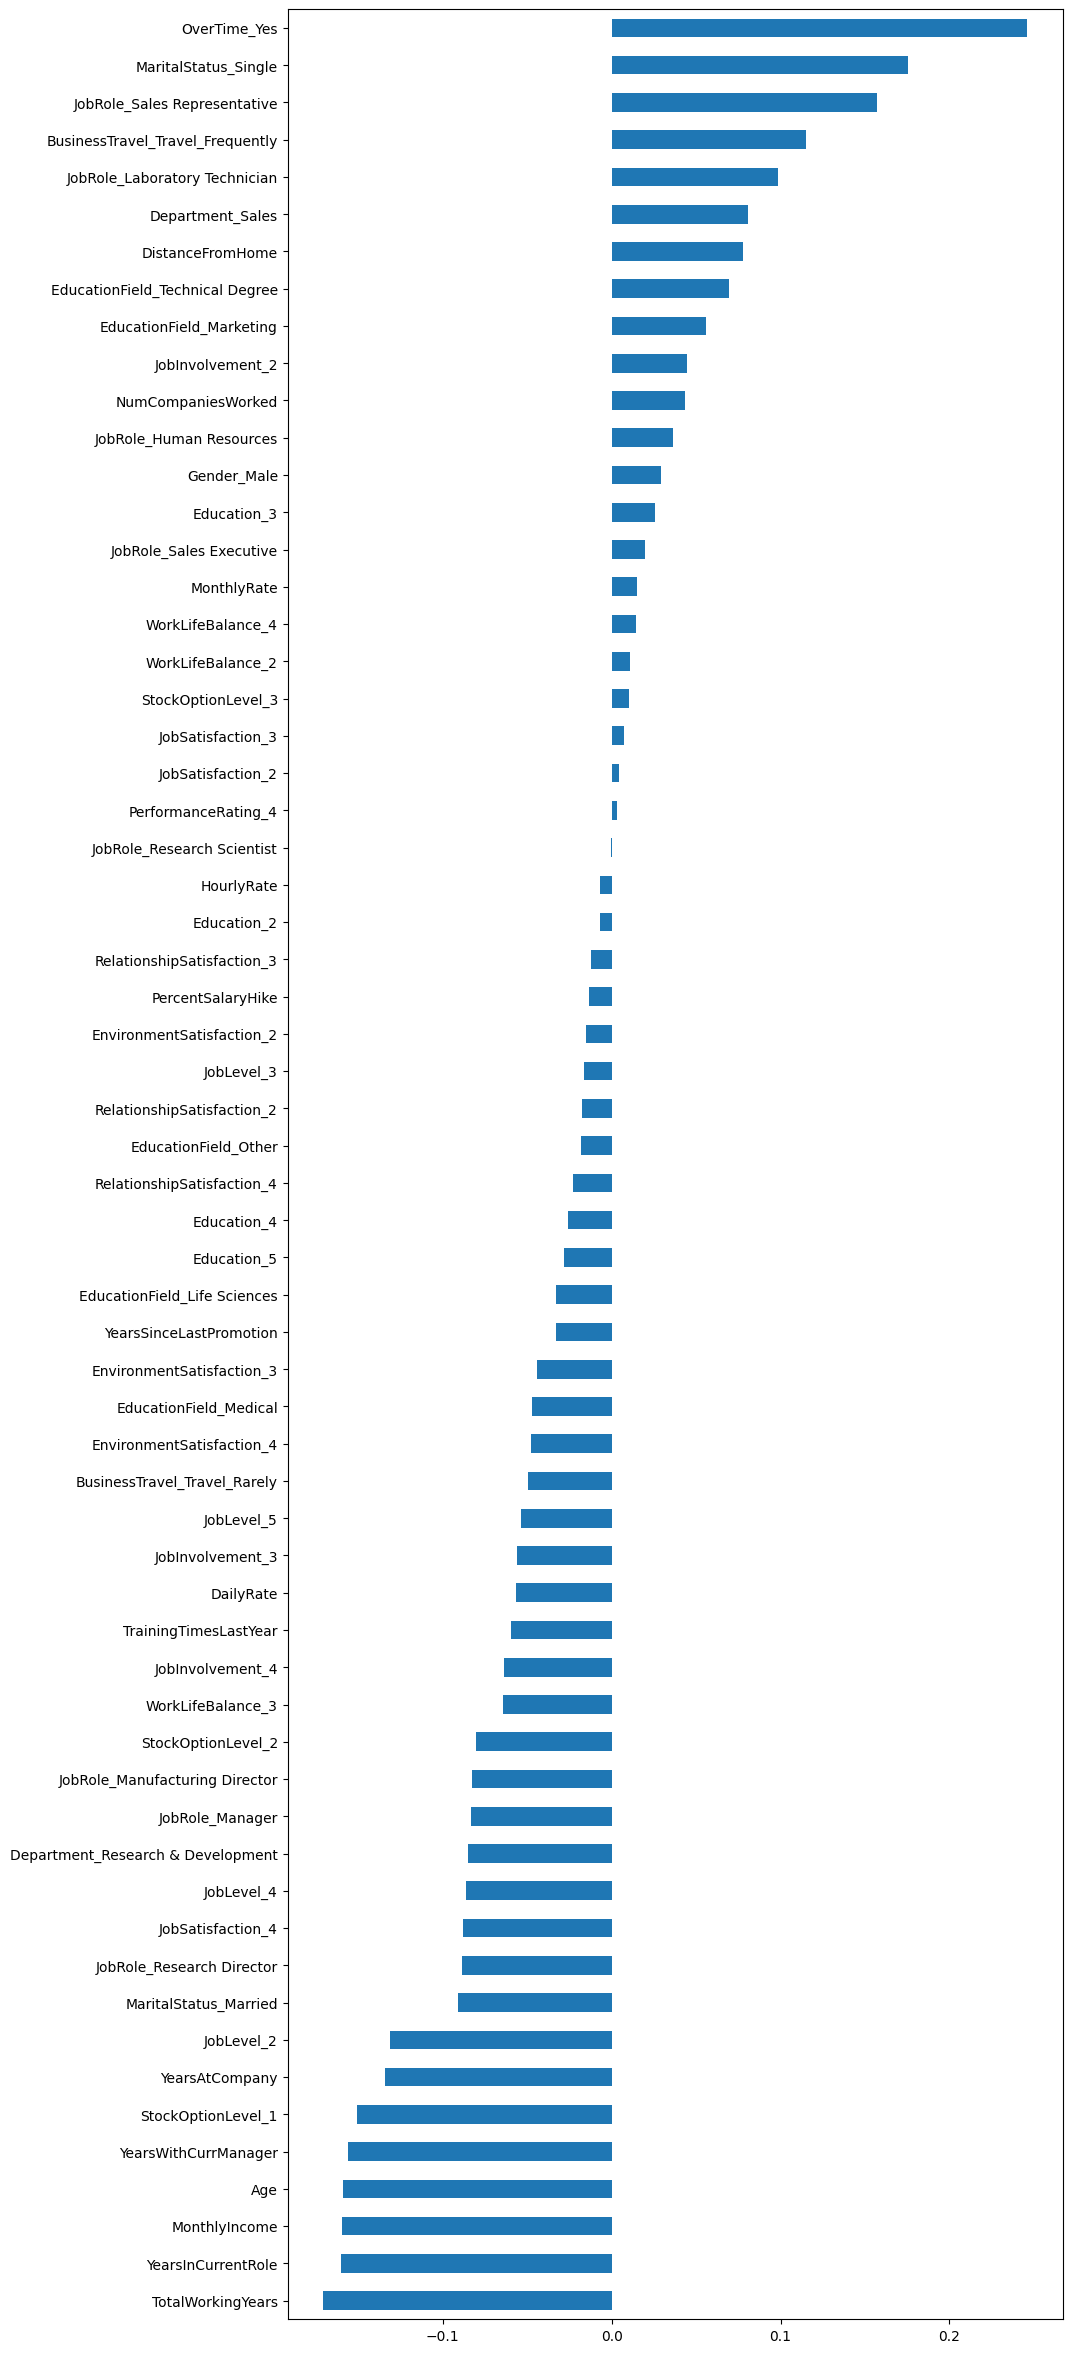

In [250]:
X_encode.drop('Attrition', axis=1).corrwith(X_encode.Attrition).sort_values().plot(kind='barh', figsize=(10, 30))

In [251]:
feature_correlation = X_encode.drop('Attrition', axis=1).corrwith(X_encode.Attrition).sort_values()
model_col = feature_correlation[np.abs(feature_correlation) > 0.02].index
len(model_col)

45

## III. Tự định nghĩa Class, Function

In [252]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

class My_GaussianNB:
    def __init__(self):
        self.classes = None
        self.mean = {}
        self.var = {}
        self.priors = {}

    def fit(self, X, y):
        self.classes = np.unique(y)
        n_samples = X.shape[0]

        for c in self.classes:
            X_c = X[y == c]
            self.priors[c] = len(X_c) / n_samples
            self.mean[c] = np.mean(X_c, axis=0)
            self.var[c] = np.var(X_c, axis=0) + 1e-9

    def _gaussian_pdf(self, x, mean, var):
        return np.exp(-((x - mean) ** 2) / (2 * var)) / np.sqrt(2 * np.pi * var)

    def predict_log_proba(self, X):
        n_samples = X.shape[0]
        n_classes = len(self.classes)
        log_probs = np.zeros((n_samples, n_classes))

        for idx, c in enumerate(self.classes):
            log_prior = np.log(self.priors[c])
            pdf = self._gaussian_pdf(X, self.mean[c], self.var[c])
            log_likelihood = np.sum(np.log(pdf + 1e-9), axis=1)
            log_probs[:, idx] = log_prior + log_likelihood

        return log_probs

    def predict(self, X):
        log_probs = self.predict_log_proba(X)
        return self.classes[np.argmax(log_probs, axis=1)]

class My_BernoulliNB:
    def __init__(self, alpha=1.0):
        self.alpha = alpha
        self.classes = None
        self.feature_prob = {}  # P(feature=1|class)
        self.priors = {}
    
    def fit(self, X, y):
        self.classes = np.unique(y)
        n_samples = X.shape[0]
        n_features = X.shape[1]
        
        for c in self.classes:
            X_c = X[y == c]
            n_c = len(X_c)
            
            # Prior probability P(class)
            self.priors[c] = n_c / n_samples
            
            # Feature probability P(feature=1|class) với Laplace smoothing
            # Smoothing: (count + alpha) / (total + 2*alpha)
            # 2*alpha vì Bernoulli có 2 giá trị (0 và 1)
            feature_count = np.sum(X_c, axis=0)
            self.feature_prob[c] = (feature_count + self.alpha) / (n_c + 2 * self.alpha)
        
        return self
    
    def predict_log_proba(self, X):
        n_samples = X.shape[0]
        n_classes = len(self.classes)
        log_probs = np.zeros((n_samples, n_classes))
        
        for idx, c in enumerate(self.classes):
            log_prior = np.log(self.priors[c])
            
            # Log likelihood cho Bernoulli:
            # log P(X|c) = Σ[x_i * log(p_i) + (1-x_i) * log(1-p_i)]
            p = self.feature_prob[c]
            log_p = np.log(p)
            log_1_p = np.log(1 - p)
            
            # Vectorized calculation
            log_likelihood = X @ log_p + (1 - X) @ log_1_p
            log_probs[:, idx] = log_prior + log_likelihood
        
        return log_probs
    
    def predict(self, X):
        log_probs = self.predict_log_proba(X)
        return self.classes[np.argmax(log_probs, axis=1)]


## IV. Xây dựng mô hình

### 1. Thực hiện với dữ liệu gốc

In [253]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def fit_and_evaluate_hybrid(gnb, bnb, 
                           X_train, y_train, 
                           X_test, y_test, 
                           description="Hybrid Gaussian–Bernoulli"):
    print("="*60)
    print(f"ĐANG HUẤN LUYỆN: {description}")


    try:
        # Copy tránh làm thay đổi data gốc
        X_train = X_train.copy()
        X_test  = X_test.copy()

        continuous_data = [
        'Age', 'DailyRate', 'DistanceFromHome', 
        'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike',  'TotalWorkingYears',
        'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'
        ]

        # scaler = StandardScaler()
        X_train_num = X_train[continuous_data].to_numpy()
        # X_train_num = scaler.fit_transform(X_train_num)
        X_train_cat = X_train.drop(continuous_data, axis=1).to_numpy()

        X_test_num = X_test[continuous_data].to_numpy()
        # X_test_num = scaler.transform(X_test_num)
        X_test_cat = X_test.drop(continuous_data, axis=1).to_numpy()



        # 1. Fit mô hình
        gnb.fit(X_train_num, y_train)
        bnb.fit(X_train_cat, y_train)

        # 2. Predict log xác suất của từng model
        log_proba_gnb = gnb.predict_log_proba(X_test_num)
        log_proba_bnb = bnb.predict_log_proba(X_test_cat)

        # 3. Cộng log xác suất (hybrid)
        combined_log = log_proba_gnb + log_proba_bnb

        # 4. Lấy class dự đoán
        y_pred = gnb.classes[np.argmax(combined_log, axis=1)]

        # 5. Đánh giá
        print(f"\n Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print("\n Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
        print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    except Exception as e:
        print(f"\n LỖI: {e}")

    print("="*60 + "\n")


In [254]:
X_encode.shape

(1470, 63)

In [255]:
from sklearn.model_selection import train_test_split

X_copy_encode = X_encode.copy()
y_copy_encode = y_encode.copy()

In [256]:
X_train_origin_t1, X_test_origin_t1, y_train_origin_t1, y_test_origin_t1 = train_test_split(
    X_encode, y_encode, test_size=0.2, random_state=42
)

X_train_origin_t2, X_test_origin_t2, y_train_origin_t2, y_test_origin_t2 = train_test_split(
    X_encode, y_encode, test_size=0.3, random_state=42
)

X_train_origin_t3, X_test_origin_t3, y_train_origin_t3, y_test_origin_t3 = train_test_split(
    X_encode, y_encode, test_size=0.4, random_state=42
)

#### 1.1. NAIVEBAYES (Numpy thuần)

In [257]:
my_gnb = My_GaussianNB()
my_bnb = My_BernoulliNB()

In [258]:
fit_and_evaluate_hybrid(my_gnb, my_bnb, 
                           X_train_origin_t1, y_train_origin_t1, 
                           X_test_origin_t1, y_test_origin_t1,
                           "Naive gnb+bnb (Numpy thuần) trên dữ liệu gốc (train/test: 4/1)")

ĐANG HUẤN LUYỆN: Naive gnb+bnb (Numpy thuần) trên dữ liệu gốc (train/test: 4/1)

 Accuracy: 0.9864

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       255
           1       1.00      0.90      0.95        39

    accuracy                           0.99       294
   macro avg       0.99      0.95      0.97       294
weighted avg       0.99      0.99      0.99       294


 Confusion Matrix:
 [[255   0]
 [  4  35]]



In [259]:
fit_and_evaluate_hybrid(my_gnb, my_bnb, 
                           X_train_origin_t2, y_train_origin_t2, 
                           X_test_origin_t2, y_test_origin_t2,
                           "Naive gnb+bnb (Numpy thuần) trên dữ liệu gốc (train/test: 7/3)")

ĐANG HUẤN LUYỆN: Naive gnb+bnb (Numpy thuần) trên dữ liệu gốc (train/test: 7/3)

 Accuracy: 0.9773

 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       380
           1       1.00      0.84      0.91        61

    accuracy                           0.98       441
   macro avg       0.99      0.92      0.95       441
weighted avg       0.98      0.98      0.98       441


 Confusion Matrix:
 [[380   0]
 [ 10  51]]



In [260]:
fit_and_evaluate_hybrid(my_gnb, my_bnb, 
                           X_train_origin_t3, y_train_origin_t3, 
                           X_test_origin_t3, y_test_origin_t3,
                           "Naive gnb+bnb (Numpy thuần) trên dữ liệu gốc (train/test: 6/4)")

ĐANG HUẤN LUYỆN: Naive gnb+bnb (Numpy thuần) trên dữ liệu gốc (train/test: 6/4)

 Accuracy: 0.9864

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       507
           1       1.00      0.90      0.95        81

    accuracy                           0.99       588
   macro avg       0.99      0.95      0.97       588
weighted avg       0.99      0.99      0.99       588


 Confusion Matrix:
 [[507   0]
 [  8  73]]



#### 1.2. NAIVEBAYES (Thư viện)

In [261]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def fit_and_evaluate_hybrid_tv(gnb, bnb, 
                            X_train, y_train, 
                            X_test, y_test, 
                            description="Hybrid Gaussian–Bernoulli"):
    print("="*60)
    print(f" ĐANG HUẤN LUYỆN: {description}")

    try:

        # Copy tránh làm thay đổi data gốc
        X_train = X_train.copy()
        X_test  = X_test.copy()

        continuous_data = [
        'Age', 'DailyRate', 'DistanceFromHome', 
        'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike', 'TotalWorkingYears',
        'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'
        ]

        # scaler = StandardScaler()
        X_train_num = X_train[continuous_data]
        # X_train_num = scaler.fit_transform(X_train_num)
        X_train_cat = X_train.drop(continuous_data, axis=1)

        X_test_num = X_test[continuous_data]
        # X_test_num = scaler.transform(X_test_num)
        X_test_cat = X_test.drop(continuous_data, axis=1)

        # 2. Fit 2 model sklearn
        gnb.fit(X_train_num, y_train)
        bnb.fit(X_train_cat, y_train)

        # 3. Predict log xác suất
        log_gnb = gnb.predict_log_proba(X_test_num)
        log_bnb = bnb.predict_log_proba(X_test_cat)

        # 4. Cộng log xác suất (hybrid)
        combined_log = log_gnb + log_bnb

        # 5. Lấy class dự đoán
        y_pred = gnb.classes_[np.argmax(combined_log, axis=1)]

        # 6. Đánh giá
        print(f"\n Accuracy: {accuracy_score(y_test, y_pred):.4f}")
        print("\n Classification Report:\n", classification_report(y_test, y_pred, zero_division=0))
        print("\n Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    except Exception as e:
        print(f"\n LỖI: {e}")

    print("="*60 + "\n")


In [262]:
from sklearn.naive_bayes import GaussianNB, BernoulliNB

lib_gnb = GaussianNB()
lib_bnb = BernoulliNB()

In [263]:
fit_and_evaluate_hybrid_tv(lib_gnb, lib_bnb, 
                           X_train_origin_t1, y_train_origin_t1, 
                           X_test_origin_t1, y_test_origin_t1,
                           "Naive gnb+bnb (Thư viện) trên dữ liệu gốc (train/test: 4/1)")

 ĐANG HUẤN LUYỆN: Naive gnb+bnb (Thư viện) trên dữ liệu gốc (train/test: 4/1)

 Accuracy: 0.9864

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       255
           1       1.00      0.90      0.95        39

    accuracy                           0.99       294
   macro avg       0.99      0.95      0.97       294
weighted avg       0.99      0.99      0.99       294


 Confusion Matrix:
 [[255   0]
 [  4  35]]



In [264]:
fit_and_evaluate_hybrid_tv(lib_gnb, lib_bnb, 
                           X_train_origin_t2, y_train_origin_t2, 
                           X_test_origin_t2, y_test_origin_t2,
                           "Naive gnb+bnb (Thư viện) trên dữ liệu gốc (train/test: 7/3)")

 ĐANG HUẤN LUYỆN: Naive gnb+bnb (Thư viện) trên dữ liệu gốc (train/test: 7/3)

 Accuracy: 0.9773

 Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.99       380
           1       1.00      0.84      0.91        61

    accuracy                           0.98       441
   macro avg       0.99      0.92      0.95       441
weighted avg       0.98      0.98      0.98       441


 Confusion Matrix:
 [[380   0]
 [ 10  51]]



In [265]:
fit_and_evaluate_hybrid_tv(lib_gnb, lib_bnb, 
                           X_train_origin_t3, y_train_origin_t3, 
                           X_test_origin_t3, y_test_origin_t3,
                           "Naive gnb+bnb (Thư viện) trên dữ liệu gốc (train/test: 6/4)")

 ĐANG HUẤN LUYỆN: Naive gnb+bnb (Thư viện) trên dữ liệu gốc (train/test: 6/4)

 Accuracy: 0.9864

 Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99       507
           1       1.00      0.90      0.95        81

    accuracy                           0.99       588
   macro avg       0.99      0.95      0.97       588
weighted avg       0.99      0.99      0.99       588


 Confusion Matrix:
 [[507   0]
 [  8  73]]



#### 1.3. Nhận xét

# Nhận xét tổng quan mô hình

- Mô hình Naive Bayes (GNB + BNB) có **accuracy cao** test (0.977 – 0.986).  
- Lớp đa số (0) được phân loại gần như **hoàn hảo** (precision & recall ~1.0).  
- Lớp thiểu số (1) có **precision, recall cao** nhưng vẫn bỏ sót một số ít mẫu.  
- Mô hình hoạt động **ổn định** với các tỉ lệ train/test khác nhau và tổng thể **tổng quát tốt**.

## V. Trực quan

In [266]:
from matplotlib import pyplot as plt

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import numpy as np
import time

def helper_and_plot(gnb,bnb,
                           X_train, y_train, 
                           X_test, y_test, 
                           reduce_name, 
                           description="gnb + bnb"):


    try:
        # Copy tránh làm thay đổi data gốc
        X_train = X_train.copy()
        X_test  = X_test.copy()
        # Danh sách các cột liên tục và phân loại
        continuous_data = [
        'Age', 'DailyRate', 'DistanceFromHome', 
        'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
        'PercentSalaryHike',  'TotalWorkingYears',
        'TrainingTimesLastYear', 'YearsAtCompany', 'YearsInCurrentRole',
        'YearsSinceLastPromotion', 'YearsWithCurrManager'
        ]

        # ---- CHUẨN HÓA ----
        scaler = StandardScaler()

        # Fit scaler trên train
        # X_train[continuous_data] = scaler.fit_transform(X_train[continuous_data])

        # Transform test 
        # X_test[continuous_data] = scaler.transform(X_test[continuous_data])

        # if reduce_name == 'PCA':
        #     model_rd = PCA(n_components=6)
        #     X_train = model_rd.fit_transform(X_train)
        #     X_test = model_rd.transform(X_test)
        # elif reduce_name == 'LDA':
        #     model_rd = LinearDiscriminantAnalysis(n_components=1)
        #     X_train = model_rd.fit_transform(X_train, y_train)
        #     X_test = model_rd.transform(X_test)

        # from imblearn.over_sampling import SMOTE
        # smote = SMOTE(random_state=42)
        # X_train, y_train = smote.fit_resample(X_train, y_train)

        # nếu muốn cân bằng dữ liệu khi train thì bỏ comment dòng trên 

        X_train_num = X_train[continuous_data]
        X_train_cat = X_train.drop(continuous_data, axis=1)

        X_test_num = X_test[continuous_data]
        X_test_cat = X_test.drop(continuous_data, axis=1)

        # 1. Fit mô hình
        gnb.fit(X_train_num, y_train)
        bnb.fit(X_train_cat, y_train)

        # 2. Predict log xác suất của từng model
        log_proba_gnb = gnb.predict_log_proba(X_test_num)
        log_proba_bnb = bnb.predict_log_proba(X_test_cat)

        # 3. Cộng log xác suất (hybrid)
        combined_log = log_proba_gnb + log_proba_bnb

        # 4. Predict log xác suất 
        y_pred = gnb.classes_[np.argmax(combined_log, axis=1)]

    except Exception as e:
        print(f"\n LỖI: {e}")




    def plot_prediction_vs_true(y_pred, y_test, title="So sánh Dự đoán và Thực tế"):
        y_pred = np.array(y_pred).flatten()
        y_test = np.array(y_test).flatten()

        plt.figure(figsize=(6, 4))
        x = np.arange(len(y_test))

        # Điểm đúng và sai
        correct = (y_pred == y_test)

        plt.scatter(x[correct], y_test[correct], color='green', label='Dự đoán đúng', marker='o')
        plt.scatter(x[~correct], y_test[~correct], color='red', label='Dự đoán sai', marker='x')

        plt.title(title, fontsize=14)
        plt.xlabel("Chỉ số mẫu (Index)")
        plt.ylabel("Nhãn (0/1)")
        plt.legend()
        plt.grid(True, linestyle='--', alpha=0.5)
        plt.tight_layout()
        plt.show()

    print()
    print('=' * 20, description, '=' * 20)
    print(f'X_train: {np.shape(X_train)}, X_test: {np.shape(X_test)}')
    print(f'Accuracy of model {gnb.__class__.__name__}: {accuracy_score(y_test, y_pred):.4f}')
    print(f'Precision: {precision_score(y_test, y_pred):.4f}')
    print(f'Recall: {recall_score(y_test, y_pred):.4f}')
    print(f'F1-score: {f1_score(y_test, y_pred):.4f}')
    print(f'Confusion matrix:\n{confusion_matrix(y_test, y_pred)}')
    print('=' * 20, description, '=' * 20)
    print()

    plot_prediction_vs_true(y_pred, y_test)

In [267]:
X_copy_encode = X_encode.copy()
y_copy_encode = y_encode.copy()

# --- TÁCH DỮ LIỆU ---
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X_copy_encode, y_copy_encode, test_size=0.4, random_state=42
)


==================== Trực quan hóa gnb + bnb - dl gốc (train/test: 6/4) ====================
X_train: (882, 63), X_test: (588, 63)
Accuracy of model GaussianNB: 0.9864
Precision: 1.0000
Recall: 0.9012
F1-score: 0.9481
Confusion matrix:
[[507   0]
 [  8  73]]
==================== Trực quan hóa gnb + bnb - dl gốc (train/test: 6/4) ====================



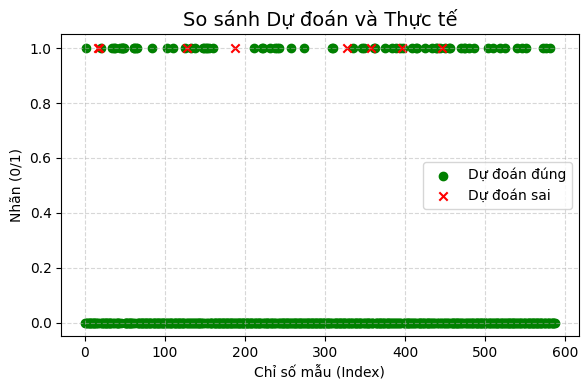

In [268]:
helper_and_plot(lib_gnb,lib_bnb,
                           X_train_val, y_train_val, 
                           X_test, y_test,
                           '*',
                           "Trực quan hóa gnb + bnb - dl gốc (train/test: 6/4)")

Quan sát:



Đánh giá mô hình có phù hợp không?
- Mức độ phù hợp:
    
- Điểm mạnh:


- Điểm hạn chế:
